# Customer Segmentation using KMeans

### Import libraries

In [11]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

### Load Data From CSV File  

In [12]:
df = pd.read_csv("customers.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing

In [13]:
df = df [['Age','Income']]
df.head()

,Age,Income
0,41,19
1,47,100
2,33,57
3,29,19
4,47,253


In [14]:
# Standarlize data
from sklearn.preprocessing import scale
df['Age'] = scale(df['Age'])
df['Income'] = scale(df['Income'])
df.head()

,Age,Income
0,0.742915,-0.718459
1,1.489490,1.384325
2,-0.252518,0.268032
3,-0.750235,-0.718459
4,1.489490,5.356249


### Modeling

In [22]:
clusterNum = 5
k_means = KMeans(n_clusters = clusterNum, n_init = 5)
k_means.fit(df)
labels = k_means.labels_
print(labels)

[3 2 3 0 4 2 3 1 0 2 2 3 0 1 0 0 0 1 1 3 0 3 0 1 2 1 0 3 3 3 2 1 0 3 0 3 3
 3 0 2 0 2 0 2 1 2 0 0 0 0 1 3 0 1 3 3 0 0 3 1 3 3 3 1 0 3 3 0 3 0 3 3 3 0
 0 3 1 3 2 1 3 3 2 3 1 0 0 0 0 0 3 3 0 0 3 1 3 3 3 0 0 2 3 1 0 1 3 0 3 2 3
 0 0 0 0 3 0 3 3 3 0 0 3 3 3 1 3 0 0 0 3 3 0 0 0 3 2 0 1 3 3 0 0 0 3 0 3 1
 0 0 3 1 3 1 3 3 2 2 0 3 0 3 3 3 0 3 3 0 0 1 2 0 0 0 0 1 3 0 0 1 3 3 0 2 3
 0 1 3 3 1 0 1 3 3 3 3 0 1 4 3 2 3 0 3 1 1 3 4 2 0 0 3 3 1 1 0 3 0 3 1 0 2
 0 0 0 0 2 0 3 1 3 3 0 0 2 0 1 0 3 0 0 3 0 0 1 2 1 3 3 0 0 0 3 3 1 0 3 0 0
 0 3 0 3 0 1 1 0 3 3 1 3 0 3 3 3 0 0 3 0 0 0 2 2 0 2 3 3 0 2 3 0 1 3 3 0 0
 0 0 0 2 1 3 0 3 0 3 3 0 3 3 3 0 1 0 3 0 3 0 3 3 2 3 2 0 0 3 0 0 2 3 3 2 0
 1 3 1 0 1 3 1 3 3 3 1 3 1 0 0 0 3 2 0 3 0 0 1 2 3 0 0 2 3 0 0 1 0 1 2 2 3
 0 0 1 1 0 3 0 3 0 0 1 0 0 1 2 3 1 0 3 3 3 3 3 3 0 3 0 2 3 3 0 0 0 0 0 1 1
 1 3 1 0 3 0 3 0 1 3 3 1 3 3 3 0 3 1 1 1 1 3 0 3 1 0 0 1 3 3 0 1 3 3 1 3 4
 3 0 3 3 1 3 2 3 0 3 2 3 0 3 0 1 1 2 0 3 0 1 3 0 3 1 2 3 3 2 1 0 1 3 0 0 0
 3 3 0 3 3 3 2 0 0 0 2 3 

### Insights
We assign the labels to each row in dataframe.

In [23]:
df["cluster"] = labels
df.head(5)

,Age,Income,cluster
0,0.742915,-0.718459,3
1,1.489490,1.384325,2
2,-0.252518,0.268032,3
3,-0.750235,-0.718459,0
4,1.489490,5.356249,4


We can easily check the centroid values by averaging the features in each cluster.

In [24]:
df.groupby('cluster').mean()

,Age,Income
cluster,,
0,-1.010015,-0.516798
1,1.415923,0.070393
2,1.061454,1.797959
3,0.110702,-0.122464
4,1.439719,5.820938


In [19]:
df.cluster.value_counts()

1    319
3    309
2    137
0     75
4     10
Name: cluster, dtype: int64

Now, lets look at the distribution of customers based on their age and income:

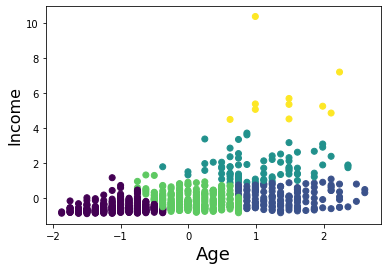

In [25]:
plt.scatter(df['Age'], df['Income'], c=labels.astype(np.float))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [21]:
k_means.inertia_    # Sum of squared distances of samples to their closest cluster center

319.11052908910705